In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np


In [2]:
# Load Spotify data (I cleaned the data by combining the top 200 songs in the US for the time period = 
#october 1, 2018 - september 30, 2019 for the purpose of the grammys and created a csv file) 

spotify_df=pd.read_csv('resources/Spotify_q2.csv')
spotify_df


,rank,uri,artist_names,artist_names_1,artist_names_2,artist_names_3,artist_names_4,artist_names_5,artist_names_6,artist_names_7,...,artist_names_10,track_name,source,peak_rank,previous_rank,weeks_on_chart,streams,season,month,week
0,1,spotify:track:78QR3Wp35dqAhFEc2qAGjE,"Lil Baby, Gunna",Lil Baby,Gunna,NaN,NaN,NaN,NaN,NaN,...,NaN,Drip Too Hard (Lil Baby & Gunna),Quality Control Music/Young Stoner Life Record...,1,18,4,11011445,Autumn,October,1
1,2,spotify:track:2xLMifQCjDGFmkHkpNLD9h,Travis Scott,Travis Scott,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,SICKO MODE,Cactus Jack / Epic / Grand Hustle,1,7,10,9596879,Autumn,October,1
2,3,spotify:track:6wWaVoUOzLQJHd3bWAUpdZ,"Lil Baby, Gunna, Drake",Lil Baby,Gunna,Drake,NaN,NaN,NaN,NaN,...,NaN,"Never Recover (Lil Baby & Gunna, Drake)",Quality Control Music/Young Stoner Life Record...,3,-1,1,9209570,Autumn,October,1
3,4,spotify:track:1xzBco0xcoJEDXktl7Jxrr,Sheck Wes,Sheck Wes,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Mo Bamba,Cactus Jack Records/ G.O.O.D. Music/ Interscop...,4,13,11,9029401,Autumn,October,1
4,5,spotify:track:0dbTQYW3Ad1FTzIA9t90E8,"Lil Wayne, Kendrick Lamar",Lil Wayne,Kendrick Lamar,NaN,NaN,NaN,NaN,NaN,...,NaN,Mona Lisa (feat. Kendrick Lamar),"Young Money Records, Inc.",1,1,2,8749506,Autumn,October,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10395,196,spotify:track:5wujBwqG7INdStqGd4tRMX,Juice WRLD,Juice WRLD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Armed And Dangerous,Juice WRLD Mixtape / ISR P&D,9,182,46,1544661,Summer,September,52
10396,197,spotify:track:5PYQUBXc7NYeI1obMKSJK0,Katy Perry,Katy Perry,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Never Really Over,Capitol Records,10,181,18,1540472,Summer,September,52
10397,198,spotify:track:0TlLq3lA83rQOYtrqBqSct,Drake,Drake,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Nonstop,Cash Money/Drake LP6,1,180,66,1539630,Summer,September,52
10398,199,spotify:track:0W45ni3uikr9z0vPjlBIDw,Summer Walker,Summer Walker,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Playing Games,LVRN/Interscope Records,199,-1,1,1530463,Summer,September,52


In [3]:
# Get a list of columns for the spotify_df

spotify_df.columns


Index(['rank', 'uri', 'artist_names', 'artist_names_1', 'artist_names_2',
       'artist_names_3', 'artist_names_4', 'artist_names_5', 'artist_names_6',
       'artist_names_7', 'artist_names_8', 'artist_names_9', 'artist_names_10',
       'track_name', 'source', 'peak_rank', 'previous_rank', 'weeks_on_chart',
       'streams', 'season', 'month', 'week'],
      dtype='object')

In [4]:
# Now rename the spotify_df column headers... we are looking to remove any unnessary columns

spotify_df.rename(columns = ({'rank':'Song Ranking','uri':'Spotify URL','artist_names': 'N1','artist_names_1':'Artist',
                              'artist_names_2':'N2','artist_names_3':'N3','artist_names_4':'N4', 'artist_names_5':'N5', 
                              'artist_names_6':'N6','artist_names_7':'N7', 'artist_names_8':'N8', 'artist_names_9':"N9", 
                              'artist_names_10':'N10','track_name': 'Track Name','source': 'Source', 
                              'peak_rank':'Peak Rank','previous_rank':'Previous Rank',
                               'weeks_on_chart':'Number of Weeks on Chart','streams':'Number of Streams',
                              'season':'Season', 'month':'Month', 'week':'Week During Eligibility Period'}),
inplace=True,)

spotify_df.columns


Index(['Song Ranking', 'Spotify URL', 'N1', 'Artist', 'N2', 'N3', 'N4', 'N5',
       'N6', 'N7', 'N8', 'N9', 'N10', 'Track Name', 'Source', 'Peak Rank',
       'Previous Rank', 'Number of Weeks on Chart', 'Number of Streams',
       'Season', 'Month', 'Week During Eligibility Period'],
      dtype='object')

In [5]:
# Remove unwanted columns

spotify_df.drop(['Spotify URL', 'N1', 'N2', 'N3', 'N4', 'N5',
       'N6', 'N7', 'N8', 'N9', 'N10', 'Source', 'Season', 'Month'], axis=1, inplace = True)


In [6]:
# Review the new columns in the table spotify_df

spotify_df.head()


,Song Ranking,Artist,Track Name,Peak Rank,Previous Rank,Number of Weeks on Chart,Number of Streams,Week During Eligibility Period
0,1,Lil Baby,Drip Too Hard (Lil Baby & Gunna),1,18,4,11011445,1
1,2,Travis Scott,SICKO MODE,1,7,10,9596879,1
2,3,Lil Baby,"Never Recover (Lil Baby & Gunna, Drake)",3,-1,1,9209570,1
3,4,Sheck Wes,Mo Bamba,4,13,11,9029401,1
4,5,Lil Wayne,Mona Lisa (feat. Kendrick Lamar),1,1,2,8749506,1


In [ ]:
# ANALYZE THE TOP 10 ARTIST IN THE SPOTIFY DATA

In [7]:
# Create a pivot table to display the total number of streams per artists

ArtistPivot = pd.pivot_table(spotify_df,index='Artist',values='Number of Streams',aggfunc='sum')
ArtistPivot


,Number of Streams
Artist,
*NSYNC,5690510
2 Chainz,16584104
21 Savage,323747104
24kGoldn,5827717
5 Seconds of Summer,174454567
...,...
Zara Larsson,43193727
Zedd,81369622
benny blanco,275978397


In [8]:
# List the 10 top artists with the most streams

top10Artist = ArtistPivot['Number of Streams'].sort_values(ascending=False).head(10)
top10Artist


Artist
Post Malone      2000352968
Billie Eilish    1582308834
Ariana Grande    1360841452
XXXTENTACION     1211082080
Juice WRLD       1071931470
Khalid            973437673
Lil Baby          717333741
Drake             633698441
Travis Scott      560552885
Lil Nas X         542893632
Name: Number of Streams, dtype: int64

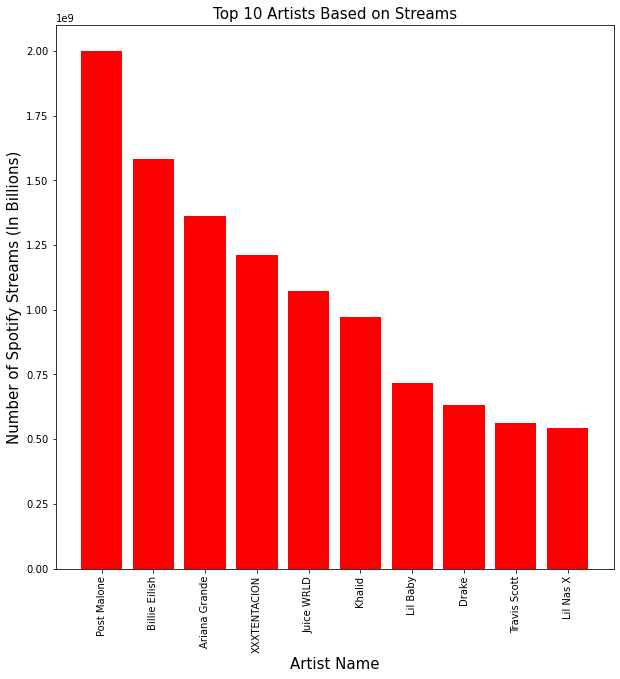

In [9]:
#Create a bar chart for the top10Artist data frame

#inserting the raw data
artist = ['Post Malone','Billie Eilish','Ariana Grande','XXXTENTACION','Juice WRLD','Khalid','Lil Baby','Drake','Travis Scott','Lil Nas X']
streams = [2000352968,1582308834,1360841452,1211082080,1071931470,973437673,717333741,633698441,560552885,542893632]



#plotting the bar
plt.figure(figsize=(10,10))
plt.bar(range(0,10),streams, color="red")
plt.xticks(range(0,10),artist,rotation=90)
plt.xlabel("Artist Name",fontsize = 15)
plt.ylabel("Number of Spotify Streams (In Billions)",fontsize=15)
plt.title ("Top 10 Artists Based on Streams",fontsize=15)
plt.savefig('resources/Top10Artists_q2.png')
plt.show()



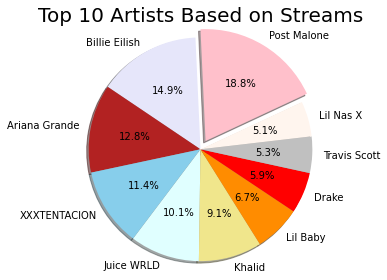

In [10]:
# Additional Visualizations
# A Pie Chart

#inserting the raw data
artist = ['Post Malone','Billie Eilish','Ariana Grande','XXXTENTACION','Juice WRLD','Khalid','Lil Baby','Drake','Travis Scott','Lil Nas X']
streams = [2000352968,1582308834,1360841452,1211082080,1071931470,973437673,717333741,633698441,560552885,542893632]
colors = ["pink","lavender","firebrick","skyblue","lightcyan","khaki","darkorange","red","silver","seashell"]
explode = (0.1,0,0,0,0,0,0,0,0,0)


#plotting the pie chart
plt.pie(streams,explode=explode,labels=artist,colors=colors,autopct="%1.1f%%",shadow=True, startangle=25,radius=1.15)
plt.axis = ("equal")
plt.title ("Top 10 Artists Based on Streams",fontsize=20)
plt.tight_layout()
plt.savefig('resources/CircleTop10Artists_q2.png')
plt.show()


In [ ]:
# ANANLYZE SPOTIFY TOP ARTIST DF & BEST NEW ARTIST GRAMMY DATA

In [11]:
# Now analyze the best new artist data to see if the winner for this category ranked in our top 10 
# spotify artist df 

#Load best new artist grammy csv

BestNewArtist_df=pd.read_csv('resources/BestNewArtist_clean_q2.csv')
BestNewArtist_df


,year,title,published_at,updated_at,category,nominee,artist,workers,img,winner
0,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best New Artist,Billie Eilish,Billie Eilish,NaN,NaN,Yes
1,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best New Artist,Black Pumas,Black Pumas,NaN,NaN,No
2,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best New Artist,Lil Nas X,Lil Nas X,NaN,NaN,No
3,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best New Artist,Lizzo,Lizzo,NaN,NaN,No
4,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best New Artist,Maggie Rogers,Maggie Rogers,NaN,NaN,No
5,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best New Artist,ROSALIA,ROSALIA,NaN,NaN,No
6,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best New Artist,Tank And The Bangas,Tank And The Bangas,NaN,NaN,No
7,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best New Artist,Yola,Yola,NaN,NaN,No


In [12]:
# Get list of columns for best new artist data frame

BestNewArtist_df.columns


Index(['year', 'title', 'published_at', 'updated_at', 'category', 'nominee',
       'artist', 'workers', 'img', 'winner'],
      dtype='object')

In [13]:
# Rename the columns in the BestNewArtist_df and make a common column that's found in the ArtistPivot table
# We are going to merge based on Artist column

BestNewArtist_df.rename(columns = ({'year':'Year','title':'Grammy Title','published_at': 'Published At', 
                               'updated_at': 'Updated At','category': 'Category', 'nominee':'Track Name',
                               'artist':'Artist',
                               'workers':'Song Credits','img':'IMG Link',
                              'winner':'Winner'}),
inplace=True,)

BestNewArtist_df.head()


,Year,Grammy Title,Published At,Updated At,Category,Track Name,Artist,Song Credits,IMG Link,Winner
0,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best New Artist,Billie Eilish,Billie Eilish,NaN,NaN,Yes
1,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best New Artist,Black Pumas,Black Pumas,NaN,NaN,No
2,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best New Artist,Lil Nas X,Lil Nas X,NaN,NaN,No
3,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best New Artist,Lizzo,Lizzo,NaN,NaN,No
4,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best New Artist,Maggie Rogers,Maggie Rogers,NaN,NaN,No


In [14]:
# Merge this data frame with the ArtistPivot table

mergeBNA_df=pd.merge(ArtistPivot,BestNewArtist_df,on="Artist", how = 'right')
mergeBNA_df.head()


,Artist,Number of Streams,Year,Grammy Title,Published At,Updated At,Category,Track Name,Song Credits,IMG Link,Winner
0,Billie Eilish,1.582309e+09,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best New Artist,Billie Eilish,NaN,NaN,Yes
1,Black Pumas,NaN,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best New Artist,Black Pumas,NaN,NaN,No
2,Lil Nas X,5.428936e+08,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best New Artist,Lil Nas X,NaN,NaN,No
3,Lizzo,3.044307e+08,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best New Artist,Lizzo,NaN,NaN,No
4,Maggie Rogers,NaN,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best New Artist,Maggie Rogers,NaN,NaN,No


In [15]:
# Get a list of all the columns

mergeBNA_df.columns


Index(['Artist', 'Number of Streams', 'Year', 'Grammy Title', 'Published At',
       'Updated At', 'Category', 'Track Name', 'Song Credits', 'IMG Link',
       'Winner'],
      dtype='object')

In [16]:
# Remove all unnecessary columns

mergeBNA_df.drop(['Published At', 'Updated At', 'Track Name',
       'Song Credits', 'IMG Link'], axis=1, inplace = True)


In [17]:
# Look at the new headers

mergeBNA_df.head()


,Artist,Number of Streams,Year,Grammy Title,Category,Winner
0,Billie Eilish,1.582309e+09,2019,62nd Annual GRAMMY Awards (2019),Best New Artist,Yes
1,Black Pumas,NaN,2019,62nd Annual GRAMMY Awards (2019),Best New Artist,No
2,Lil Nas X,5.428936e+08,2019,62nd Annual GRAMMY Awards (2019),Best New Artist,No
3,Lizzo,3.044307e+08,2019,62nd Annual GRAMMY Awards (2019),Best New Artist,No
4,Maggie Rogers,NaN,2019,62nd Annual GRAMMY Awards (2019),Best New Artist,No


In [18]:
# There are numerical columns with missing data that should be numbers but are not populated becasue some 
# artists did not appear in our ArtistPivot table 
# Therefore fill any empty data / nAs with 0 

cleanmergeBNA_df = mergeBNA_df.fillna(0)
cleanmergeBNA_df


,Artist,Number of Streams,Year,Grammy Title,Category,Winner
0,Billie Eilish,1.582309e+09,2019,62nd Annual GRAMMY Awards (2019),Best New Artist,Yes
1,Black Pumas,0.000000e+00,2019,62nd Annual GRAMMY Awards (2019),Best New Artist,No
2,Lil Nas X,5.428936e+08,2019,62nd Annual GRAMMY Awards (2019),Best New Artist,No
3,Lizzo,3.044307e+08,2019,62nd Annual GRAMMY Awards (2019),Best New Artist,No
4,Maggie Rogers,0.000000e+00,2019,62nd Annual GRAMMY Awards (2019),Best New Artist,No
5,ROSALIA,1.594385e+07,2019,62nd Annual GRAMMY Awards (2019),Best New Artist,No
6,Tank And The Bangas,0.000000e+00,2019,62nd Annual GRAMMY Awards (2019),Best New Artist,No
7,Yola,0.000000e+00,2019,62nd Annual GRAMMY Awards (2019),Best New Artist,No


In [19]:
# Review the datatype
# Will need to convert the Number of Streams into Intergers

cleanmergeBNA_df.dtypes


Artist                object
Number of Streams    float64
Year                   int64
Grammy Title          object
Category              object
Winner                object
dtype: object

In [20]:
# Update data type and review new column data type

cleanmergeBNA_df['Number of Streams ']=cleanmergeBNA_df['Number of Streams'].astype(np.int64)
cleanmergeBNA_df.dtypes


Artist                 object
Number of Streams     float64
Year                    int64
Grammy Title           object
Category               object
Winner                 object
Number of Streams       int64
dtype: object

In [21]:
# We need to remove the Number of Streams float column

newcleanmergeBNA_df = cleanmergeBNA_df.set_axis(['Artist', 'NO', 'Year', 'Grammy Title', 'Category',
                                                 'Winner','Number of Streams'], axis=1, inplace=False)
newcleanmergeBNA_df


,Artist,NO,Year,Grammy Title,Category,Winner,Number of Streams
0,Billie Eilish,1.582309e+09,2019,62nd Annual GRAMMY Awards (2019),Best New Artist,Yes,1582308834
1,Black Pumas,0.000000e+00,2019,62nd Annual GRAMMY Awards (2019),Best New Artist,No,0
2,Lil Nas X,5.428936e+08,2019,62nd Annual GRAMMY Awards (2019),Best New Artist,No,542893632
3,Lizzo,3.044307e+08,2019,62nd Annual GRAMMY Awards (2019),Best New Artist,No,304430684
4,Maggie Rogers,0.000000e+00,2019,62nd Annual GRAMMY Awards (2019),Best New Artist,No,0
5,ROSALIA,1.594385e+07,2019,62nd Annual GRAMMY Awards (2019),Best New Artist,No,15943848
6,Tank And The Bangas,0.000000e+00,2019,62nd Annual GRAMMY Awards (2019),Best New Artist,No,0
7,Yola,0.000000e+00,2019,62nd Annual GRAMMY Awards (2019),Best New Artist,No,0


In [22]:
# Drop other column 
newcleanmergeBNA_df.drop(['NO'], axis=1, inplace = True)


In [23]:
# View the new data frame
newcleanmergeBNA_df.head(10)


,Artist,Year,Grammy Title,Category,Winner,Number of Streams
0,Billie Eilish,2019,62nd Annual GRAMMY Awards (2019),Best New Artist,Yes,1582308834
1,Black Pumas,2019,62nd Annual GRAMMY Awards (2019),Best New Artist,No,0
2,Lil Nas X,2019,62nd Annual GRAMMY Awards (2019),Best New Artist,No,542893632
3,Lizzo,2019,62nd Annual GRAMMY Awards (2019),Best New Artist,No,304430684
4,Maggie Rogers,2019,62nd Annual GRAMMY Awards (2019),Best New Artist,No,0
5,ROSALIA,2019,62nd Annual GRAMMY Awards (2019),Best New Artist,No,15943848
6,Tank And The Bangas,2019,62nd Annual GRAMMY Awards (2019),Best New Artist,No,0
7,Yola,2019,62nd Annual GRAMMY Awards (2019),Best New Artist,No,0


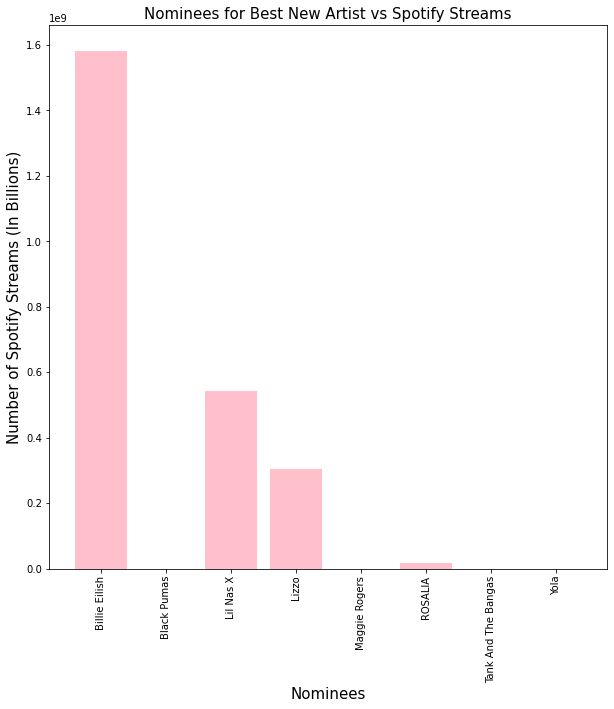

In [24]:
#Create a bar chart for the Best New Artist data frame

#inserting the raw data
newartist = ['Billie Eilish','Black Pumas','Lil Nas X','Lizzo','Maggie Rogers','ROSALIA', 'Tank And The Bangas','Yola']
streams = [1582308834,0,542893632,304430684,0,15943848,0,0]



#plotting the bar
plt.figure(figsize=(10,10))
plt.bar(range(0,8),streams, color="pink")
plt.xticks(range(0,8),newartist,rotation=90)
plt.xlabel("Nominees",fontsize = 15)
plt.ylabel("Number of Spotify Streams (In Billions)",fontsize=15)
plt.title ("Nominees for Best New Artist vs Spotify Streams",fontsize=15)
plt.savefig('resources/BestNewArtist_q2.png')
plt.show()


In [ ]:
# ANALYZE THE TOP 10 SONGS IN SPOTIFY DF 

In [25]:
# Create a pivot table to create the total number of track name streams 

TrackNamePivot = pd.pivot_table(spotify_df,index='Track Name',values='Number of Streams',aggfunc='sum')
TrackNamePivot


,Number of Streams
Track Name,
!,2713826
#PROUDCATOWNERREMIX,1922659
1 SIDED LOVE,1525582
1-800-273-8255,13638116
1.5,8834772
...,...
when the party's over - Recorded at Spotify Studios NYC,1634726
whoa (mind in awe),59984619
wish you were gay,107081185


In [26]:
# List the top 10 songs with the most streams

top10TrackName=TrackNamePivot['Number of Streams'].sort_values(ascending=False).head(10)
top10TrackName


Track Name
Sunflower - Spider-Man: Into the Spider-Verse    434879595
Drip Too Hard (Lil Baby & Gunna)                 297904285
thank u, next                                    292828353
SICKO MODE                                       291735974
Wow.                                             280738276
Without Me                                       261729933
Going Bad (feat. Drake)                          259627327
7 rings                                          259574378
MIDDLE CHILD                                     253135604
ZEZE (feat. Travis Scott & Offset)               252968224
Name: Number of Streams, dtype: int64

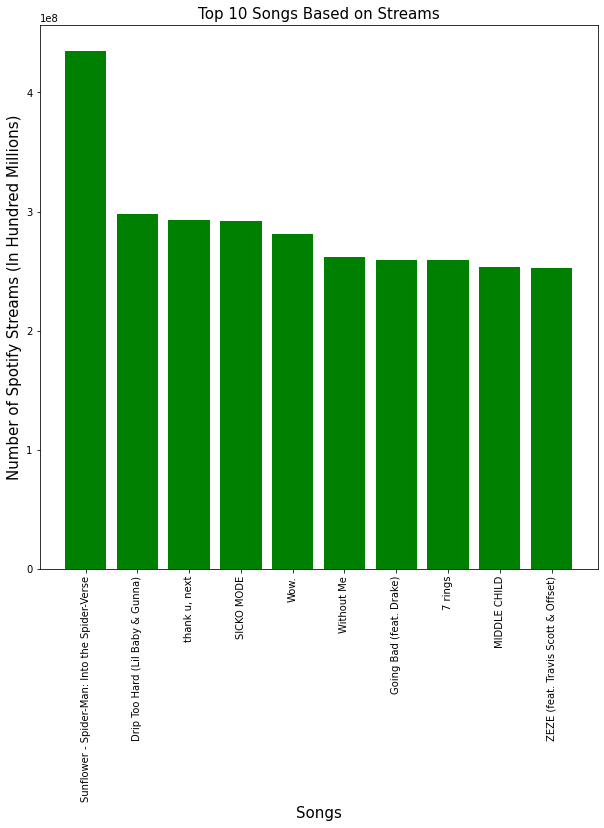

In [27]:
#Create a bar chart for the top10Artist data frame

#inserting the raw data
trackname = ['Sunflower - Spider-Man: Into the Spider-Verse','Drip Too Hard (Lil Baby & Gunna)','thank u, next',      
          'SICKO MODE','Wow.','Without Me','Going Bad (feat. Drake)','7 rings','MIDDLE CHILD',
          'ZEZE (feat. Travis Scott & Offset)']
streams = [434879595,297904285,292828353,291735974,280738276,261729933,259627327,259574378,253135604,252968224]



#plotting the bar
plt.figure(figsize=(10,10))
plt.bar(range(0,10),streams, color="green")
plt.xticks(range(0,10),trackname,rotation=90)
plt.xlabel("Songs",fontsize = 15)
plt.ylabel("Number of Spotify Streams (In Hundred Millions)",fontsize=15)
plt.title ("Top 10 Songs Based on Streams",fontsize=15)
plt.savefig('resources/Top10Songs_q2.png')
plt.show()


In [ ]:
# ANANLYZE SPOTIFY SONGS & RECORD OF THE YEAR GRAMMY DATA

In [28]:
# Now analyze the Record of the Year data to see if the winner for this category ranked in our top 10 Spotify Songs
#Load the csv file that contains song of the year
RecordofYear_df=pd.read_csv('resources/RecordofYear_clean_q2.csv')
RecordofYear_df


,year,title,published_at,updated_at,category,nominee,artist,workers,img,winner
0,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,bad guy,Billie Eilish,"Finneas O'Connell, producer; Rob Kinelski & Fi...",https://www.grammy.com/sites/com/files/styles/...,Yes
1,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,"Hey, Ma",Bon Iver,"BJ Burton, Brad Cook, Chris Messina & Justin V...",https://www.grammy.com/sites/com/files/styles/...,No
2,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,7 rings,Ariana Grande,"Charles Anderson, Tommy Brown, Michael Foster ...",https://www.grammy.com/sites/com/files/styles/...,No
3,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Hard Place,H.E.R.,"Rodney ‚ÄúDarkchild‚Äù Jerkins, producer; Jose...",https://www.grammy.com/sites/com/files/styles/...,No
4,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Talk,Khalid,"Disclosure & Denis Kosiak, producers; Ingmar C...",https://www.grammy.com/sites/com/files/styles/...,No
5,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Old Town Road,Lil Nas X,"Andrew ""VoxGod"" Bolooki, Jocelyn ‚ÄúJozzy‚Äù D...",https://www.grammy.com/sites/com/files/styles/...,No
6,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Truth Hurts,Lizzo,"Ricky Reed & Tele, producers; Chris Galland, M...",https://www.grammy.com/sites/com/files/styles/...,No
7,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,"Louis Bell & Carter Lang, producers; Louis Bel...",https://www.grammy.com/sites/com/files/styles/...,No


In [29]:
# Get list of columns
RecordofYear_df.columns


Index(['year', 'title', 'published_at', 'updated_at', 'category', 'nominee',
       'artist', 'workers', 'img', 'winner'],
      dtype='object')

In [30]:
# Rename the columns and make a common column name so we can complete the 
# We are going to merge based on Track Name column
RecordofYear_df.rename(columns = ({'year':'Year','title':'Grammy Title','published_at': 'Published At', 
                               'updated_at': 'Updated At','category': 'Category', 'nominee':'Track Name',
                               'artist':'Artist',
                               'workers':'Song Credits','img':'IMG Link',
                              'winner':'Winner'}),
inplace=True,)

RecordofYear_df.head()


,Year,Grammy Title,Published At,Updated At,Category,Track Name,Artist,Song Credits,IMG Link,Winner
0,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,bad guy,Billie Eilish,"Finneas O'Connell, producer; Rob Kinelski & Fi...",https://www.grammy.com/sites/com/files/styles/...,Yes
1,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,"Hey, Ma",Bon Iver,"BJ Burton, Brad Cook, Chris Messina & Justin V...",https://www.grammy.com/sites/com/files/styles/...,No
2,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,7 rings,Ariana Grande,"Charles Anderson, Tommy Brown, Michael Foster ...",https://www.grammy.com/sites/com/files/styles/...,No
3,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Hard Place,H.E.R.,"Rodney ‚ÄúDarkchild‚Äù Jerkins, producer; Jose...",https://www.grammy.com/sites/com/files/styles/...,No
4,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Talk,Khalid,"Disclosure & Denis Kosiak, producers; Ingmar C...",https://www.grammy.com/sites/com/files/styles/...,No


In [31]:
# Now merge the spotify_df with the new df using a right join on the column Track Name 
# This displays data for artist found in both data frames
RecordofYearMerge=pd.merge(TrackNamePivot,RecordofYear_df,on="Track Name", how = 'right')
RecordofYearMerge.head()


,Track Name,Number of Streams,Year,Grammy Title,Published At,Updated At,Category,Artist,Song Credits,IMG Link,Winner
0,bad guy,220247075.0,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Billie Eilish,"Finneas O'Connell, producer; Rob Kinelski & Fi...",https://www.grammy.com/sites/com/files/styles/...,Yes
1,"Hey, Ma",NaN,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Bon Iver,"BJ Burton, Brad Cook, Chris Messina & Justin V...",https://www.grammy.com/sites/com/files/styles/...,No
2,7 rings,259574378.0,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Ariana Grande,"Charles Anderson, Tommy Brown, Michael Foster ...",https://www.grammy.com/sites/com/files/styles/...,No
3,Hard Place,NaN,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,H.E.R.,"Rodney ‚ÄúDarkchild‚Äù Jerkins, producer; Jose...",https://www.grammy.com/sites/com/files/styles/...,No
4,Talk,46824327.0,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Khalid,"Disclosure & Denis Kosiak, producers; Ingmar C...",https://www.grammy.com/sites/com/files/styles/...,No


In [32]:
# Get a list of all the columns
RecordofYearMerge.columns


Index(['Track Name', 'Number of Streams', 'Year', 'Grammy Title',
       'Published At', 'Updated At', 'Category', 'Artist', 'Song Credits',
       'IMG Link', 'Winner'],
      dtype='object')

In [33]:
# Remove all unnecessary columns
RecordofYearMerge.drop(['Published At', 'Updated At', 'Song Credits',
       'IMG Link'], axis=1, inplace = True)

In [34]:
# Review new columns
RecordofYearMerge.head()


,Track Name,Number of Streams,Year,Grammy Title,Category,Artist,Winner
0,bad guy,220247075.0,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,Billie Eilish,Yes
1,"Hey, Ma",NaN,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,Bon Iver,No
2,7 rings,259574378.0,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,Ariana Grande,No
3,Hard Place,NaN,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,H.E.R.,No
4,Talk,46824327.0,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,Khalid,No


In [35]:
# There are numerical columns with missing data that should be numbers but are not populated becasue the 
# artist did not appear have any songs appear in the spotify_df due to the US top weekly only showcasing 
# the top 200 songs per week
# Therefore fill any empty data / nAs with 0 
cleanRecordofYearMerge = RecordofYearMerge.fillna(0)
cleanRecordofYearMerge


,Track Name,Number of Streams,Year,Grammy Title,Category,Artist,Winner
0,bad guy,220247075.0,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,Billie Eilish,Yes
1,"Hey, Ma",0.0,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,Bon Iver,No
2,7 rings,259574378.0,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,Ariana Grande,No
3,Hard Place,0.0,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,H.E.R.,No
4,Talk,46824327.0,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,Khalid,No
5,Old Town Road,137909882.0,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,Lil Nas X,No
6,Truth Hurts,185064517.0,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,Lizzo,No
7,Sunflower - Spider-Man: Into the Spider-Verse,434879595.0,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,Post Malone,No


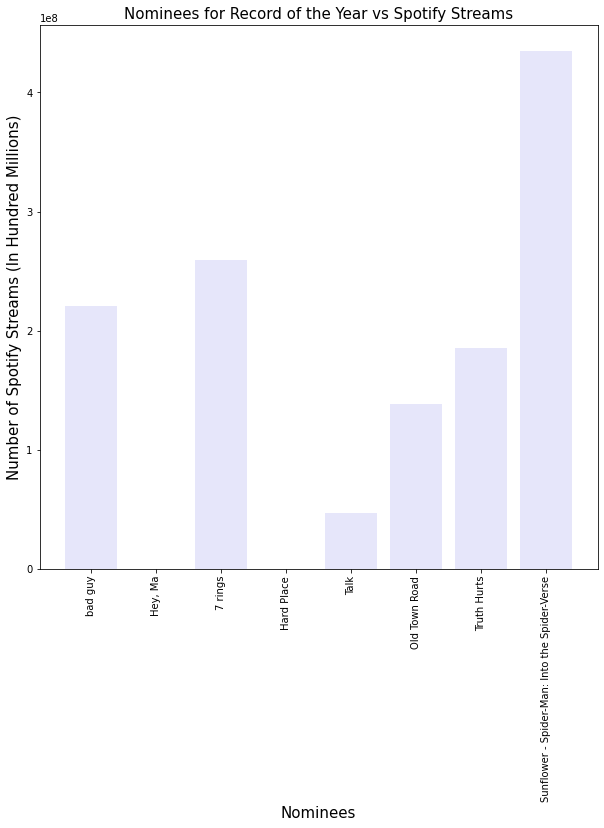

In [83]:
#Create a bar chart for the Record of the Year data frame

#inserting the raw data
recordoftheyear = ['bad guy','Hey, Ma','7 rings','Hard Place','Talk',
             'Old Town Road','Truth Hurts','Sunflower - Spider-Man: Into the Spider-Verse']
streams = [220247075,0,259574378,0,46824327,137909882,185064517,434879595]



#plotting the bar
plt.figure(figsize=(10,10))
plt.bar(range(0,8),streams, color="lavender")
plt.xticks(range(0,8),recordoftheyear,rotation=90)
plt.xlabel("Nominees",fontsize = 15)
plt.ylabel("Number of Spotify Streams (In Hundred Millions)",fontsize=15)
plt.title ("Nominees for Record of the Year vs Spotify Streams",fontsize=15)
plt.savefig('resources/RecordoftheYear_q2.png')

In [ ]:
# ANANLYZE SPOTIFY SONGS & SONG OF THE YEAR GRAMMY DATA

In [38]:
# Now analyze the Song of the Year data to see if the winner for this category ranked in our top 10 Spotify Songs
#Load the csv file that contains song of the year
SongofYear_df=pd.read_csv('resources/SongofYear_clean_q2.csv')
SongofYear_df


,year,title,published_at,updated_at,category,nominee,artist,workers,img,winner
0,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Song Of The Year,bad guy,Billie Eilish,"Billie Eilish O'Connell & Finneas O'Connell, s...",https://www.grammy.com/sites/com/files/styles/...,Yes
1,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Song Of The Year,Always Remember Us This Way,Lady Gaga,"Natalie Hemby, Lady Gaga, Hillary Lindsey & Lo...",https://www.grammy.com/sites/com/files/styles/...,No
2,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Song Of The Year,Bring My Flowers Now,Tanya Tucker,"Brandi Carlile, Phil Hanseroth, Tim Hanseroth ...",https://www.grammy.com/sites/com/files/styles/...,No
3,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Song Of The Year,Hard Place,H.E.R.,"Ruby Amanfu, Sam Ashworth, D. Arcelious Harris...",https://www.grammy.com/sites/com/files/styles/...,No
4,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Song Of The Year,Lover,Taylor Swift,"Taylor Swift, songwriter (Taylor Swift)",https://www.grammy.com/sites/com/files/styles/...,No
5,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Song Of The Year,Norman fucking Rockwell,Lana Del Rey,"Jack Antonoff & Lana Del Rey, songwriters (Lan...",https://www.grammy.com/sites/com/files/styles/...,No
6,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Song Of The Year,Someone You Loved,Lewis Capaldi,"Tom Barnes, Lewis Capaldi, Pete Kelleher, Benj...",https://www.grammy.com/sites/com/files/styles/...,No
7,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Song Of The Year,Truth Hurts,Lizzo,"Steven Cheung, Eric Frederic, Melissa Jefferso...",https://www.grammy.com/sites/com/files/styles/...,No


In [39]:
# Get list of columns
SongofYear_df.columns


Index(['year', 'title', 'published_at', 'updated_at', 'category', 'nominee',
       'artist', 'workers', 'img', 'winner'],
      dtype='object')

In [40]:
# Rename the columns in the df and make a common column name so we can complete the 
# We are going to merge based on Track Name column
SongofYear_df.rename(columns = ({'year':'Year','title':'Grammy Title','published_at': 'Published At', 
                               'updated_at': 'Updated At','category': 'Category', 'nominee':'Track Name',
                               'artist':'Artist',
                               'workers':'Song Credits','img':'IMG Link',
                              'winner':'Winner'}),
inplace=True,)

SongofYear_df.head()


,Year,Grammy Title,Published At,Updated At,Category,Track Name,Artist,Song Credits,IMG Link,Winner
0,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Song Of The Year,bad guy,Billie Eilish,"Billie Eilish O'Connell & Finneas O'Connell, s...",https://www.grammy.com/sites/com/files/styles/...,Yes
1,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Song Of The Year,Always Remember Us This Way,Lady Gaga,"Natalie Hemby, Lady Gaga, Hillary Lindsey & Lo...",https://www.grammy.com/sites/com/files/styles/...,No
2,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Song Of The Year,Bring My Flowers Now,Tanya Tucker,"Brandi Carlile, Phil Hanseroth, Tim Hanseroth ...",https://www.grammy.com/sites/com/files/styles/...,No
3,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Song Of The Year,Hard Place,H.E.R.,"Ruby Amanfu, Sam Ashworth, D. Arcelious Harris...",https://www.grammy.com/sites/com/files/styles/...,No
4,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Song Of The Year,Lover,Taylor Swift,"Taylor Swift, songwriter (Taylor Swift)",https://www.grammy.com/sites/com/files/styles/...,No


In [41]:
# Now merge the spotify_df with new df using a right join on the column Track Name 
# This displays data for artist found in both data frames
SongofYearMerge=pd.merge(TrackNamePivot,SongofYear_df,on="Track Name", how = 'right')
SongofYearMerge.head()


,Track Name,Number of Streams,Year,Grammy Title,Published At,Updated At,Category,Artist,Song Credits,IMG Link,Winner
0,bad guy,220247075.0,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Song Of The Year,Billie Eilish,"Billie Eilish O'Connell & Finneas O'Connell, s...",https://www.grammy.com/sites/com/files/styles/...,Yes
1,Always Remember Us This Way,21711412.0,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Song Of The Year,Lady Gaga,"Natalie Hemby, Lady Gaga, Hillary Lindsey & Lo...",https://www.grammy.com/sites/com/files/styles/...,No
2,Bring My Flowers Now,NaN,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Song Of The Year,Tanya Tucker,"Brandi Carlile, Phil Hanseroth, Tim Hanseroth ...",https://www.grammy.com/sites/com/files/styles/...,No
3,Hard Place,NaN,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Song Of The Year,H.E.R.,"Ruby Amanfu, Sam Ashworth, D. Arcelious Harris...",https://www.grammy.com/sites/com/files/styles/...,No
4,Lover,44441498.0,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Song Of The Year,Taylor Swift,"Taylor Swift, songwriter (Taylor Swift)",https://www.grammy.com/sites/com/files/styles/...,No


In [42]:
# Get a list of all the columns
SongofYearMerge.columns


Index(['Track Name', 'Number of Streams', 'Year', 'Grammy Title',
       'Published At', 'Updated At', 'Category', 'Artist', 'Song Credits',
       'IMG Link', 'Winner'],
      dtype='object')

In [43]:
# Remove all unnecessary columns
SongofYearMerge.drop(['Published At', 'Updated At', 'Song Credits',
       'IMG Link'], axis=1, inplace = True)


In [44]:
# Review new columns
SongofYearMerge.head()


,Track Name,Number of Streams,Year,Grammy Title,Category,Artist,Winner
0,bad guy,220247075.0,2019,62nd Annual GRAMMY Awards (2019),Song Of The Year,Billie Eilish,Yes
1,Always Remember Us This Way,21711412.0,2019,62nd Annual GRAMMY Awards (2019),Song Of The Year,Lady Gaga,No
2,Bring My Flowers Now,NaN,2019,62nd Annual GRAMMY Awards (2019),Song Of The Year,Tanya Tucker,No
3,Hard Place,NaN,2019,62nd Annual GRAMMY Awards (2019),Song Of The Year,H.E.R.,No
4,Lover,44441498.0,2019,62nd Annual GRAMMY Awards (2019),Song Of The Year,Taylor Swift,No


In [45]:
# There are numerical columns with missing data that should be numbers but are not populated becasue the 
# artist did not appear have any songs appear in the spotify_df due to the US top weekly only showcasing 
# the top 200 songs per week
# Therefore fill any empty data / nAs with 0 
cleanSongofYearMerge = SongofYearMerge.fillna(0)
cleanSongofYearMerge


,Track Name,Number of Streams,Year,Grammy Title,Category,Artist,Winner
0,bad guy,220247075.0,2019,62nd Annual GRAMMY Awards (2019),Song Of The Year,Billie Eilish,Yes
1,Always Remember Us This Way,21711412.0,2019,62nd Annual GRAMMY Awards (2019),Song Of The Year,Lady Gaga,No
2,Bring My Flowers Now,0.0,2019,62nd Annual GRAMMY Awards (2019),Song Of The Year,Tanya Tucker,No
3,Hard Place,0.0,2019,62nd Annual GRAMMY Awards (2019),Song Of The Year,H.E.R.,No
4,Lover,44441498.0,2019,62nd Annual GRAMMY Awards (2019),Song Of The Year,Taylor Swift,No
5,Norman fucking Rockwell,5060716.0,2019,62nd Annual GRAMMY Awards (2019),Song Of The Year,Lana Del Rey,No
6,Someone You Loved,90216295.0,2019,62nd Annual GRAMMY Awards (2019),Song Of The Year,Lewis Capaldi,No
7,Truth Hurts,185064517.0,2019,62nd Annual GRAMMY Awards (2019),Song Of The Year,Lizzo,No


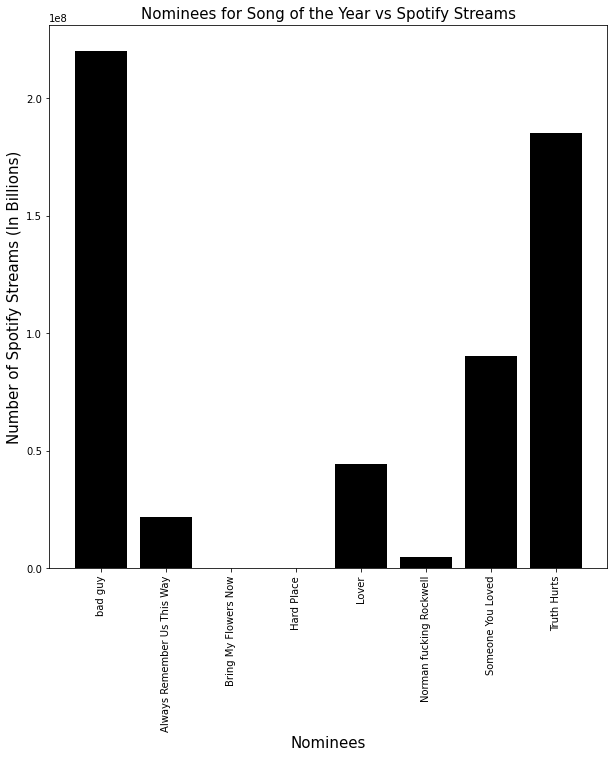

In [46]:
#Create a bar chart for the Song of the Year data frame

#inserting the raw data
songoftheyear = ['bad guy','Always Remember Us This Way','Bring My Flowers Now','Hard Place','Lover',
             'Norman fucking Rockwell','Someone You Loved','Truth Hurts']
streams = [220247075,21711412,0,0,44441498,5060716,90216295,185064517]



#plotting the bar
plt.figure(figsize=(10,10))
plt.bar(range(0,8),streams, color="black")
plt.xticks(range(0,8),songoftheyear,rotation=90)
plt.xlabel("Nominees",fontsize = 15)
plt.ylabel("Number of Spotify Streams (In Billions)",fontsize=15)
plt.title ("Nominees for Song of the Year vs Spotify Streams",fontsize=15)
plt.savefig('resources/SongoftheYear_q2.png')
plt.show()


In [ ]:
# ANANLYZE SPOTIFY SONGS & BEST RAP SONG GRAMMY DATA

In [47]:
#Load the csv file that contains rap
RapSong_df=pd.read_csv('resources/BestRapSong_clean_q2.csv')
RapSong_df


,year,title,published_at,updated_at,category,nominee,artist,workers,img,winner
0,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best Rap Song,a lot,21 Savage,"Jermaine Cole, Dacoury Natche, 21 Savage & Ant...",https://www.grammy.com/sites/com/files/styles/...,Yes
1,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best Rap Song,Bad Idea,Cordae,"Chancelor Bennett, Cordae Dunston, Uforo Ebong...",https://www.grammy.com/sites/com/files/styles/...,No
2,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best Rap Song,Gold Roses (feat. Drake),Rick Ross,"Noel Cadastre, Aubrey Graham, Anderson Hernand...",https://www.grammy.com/sites/com/files/styles/...,No
3,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best Rap Song,Racks in the Middle (feat. Roddy Ricch and Hit...,Nipsey Hussle,"Ermias Asghedom, Dustin James Corbett, Greg Al...",https://www.grammy.com/sites/com/files/styles/...,No
4,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best Rap Song,Suge,DaBaby,"DaBaby, Jetsonmade & Pooh Beatz, songwriters (...",https://www.grammy.com/sites/com/files/styles/...,No


In [48]:
# Get list of columns
RapSong_df.columns


Index(['year', 'title', 'published_at', 'updated_at', 'category', 'nominee',
       'artist', 'workers', 'img', 'winner'],
      dtype='object')

In [49]:
# Rename the columns in the df and make a common column name so we can complete the 
# We are going to merge based on Track Name column
RapSong_df.rename(columns = ({'year':'Year','title':'Grammy Title','published_at': 'Published At', 
                               'updated_at': 'Updated At','category': 'Category', 'nominee':'Track Name',
                               'artist':'Artist',
                               'workers':'Song Credits','img':'IMG Link',
                              'winner':'Winner'}),
inplace=True,)

RapSong_df.head()


,Year,Grammy Title,Published At,Updated At,Category,Track Name,Artist,Song Credits,IMG Link,Winner
0,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best Rap Song,a lot,21 Savage,"Jermaine Cole, Dacoury Natche, 21 Savage & Ant...",https://www.grammy.com/sites/com/files/styles/...,Yes
1,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best Rap Song,Bad Idea,Cordae,"Chancelor Bennett, Cordae Dunston, Uforo Ebong...",https://www.grammy.com/sites/com/files/styles/...,No
2,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best Rap Song,Gold Roses (feat. Drake),Rick Ross,"Noel Cadastre, Aubrey Graham, Anderson Hernand...",https://www.grammy.com/sites/com/files/styles/...,No
3,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best Rap Song,Racks in the Middle (feat. Roddy Ricch and Hit...,Nipsey Hussle,"Ermias Asghedom, Dustin James Corbett, Greg Al...",https://www.grammy.com/sites/com/files/styles/...,No
4,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best Rap Song,Suge,DaBaby,"DaBaby, Jetsonmade & Pooh Beatz, songwriters (...",https://www.grammy.com/sites/com/files/styles/...,No


In [50]:
# Now merge the spotify_df with the new df using a right join on the column Track Name 
# This displays data for artist found in both data frames
RapSongMerge=pd.merge(TrackNamePivot,RapSong_df,on="Track Name", how = 'right')
RapSongMerge.head()


,Track Name,Number of Streams,Year,Grammy Title,Published At,Updated At,Category,Artist,Song Credits,IMG Link,Winner
0,a lot,169203004.0,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best Rap Song,21 Savage,"Jermaine Cole, Dacoury Natche, 21 Savage & Ant...",https://www.grammy.com/sites/com/files/styles/...,Yes
1,Bad Idea,NaN,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best Rap Song,Cordae,"Chancelor Bennett, Cordae Dunston, Uforo Ebong...",https://www.grammy.com/sites/com/files/styles/...,No
2,Gold Roses (feat. Drake),10575226.0,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best Rap Song,Rick Ross,"Noel Cadastre, Aubrey Graham, Anderson Hernand...",https://www.grammy.com/sites/com/files/styles/...,No
3,Racks in the Middle (feat. Roddy Ricch and Hit...,31432352.0,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best Rap Song,Nipsey Hussle,"Ermias Asghedom, Dustin James Corbett, Greg Al...",https://www.grammy.com/sites/com/files/styles/...,No
4,Suge,145471665.0,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best Rap Song,DaBaby,"DaBaby, Jetsonmade & Pooh Beatz, songwriters (...",https://www.grammy.com/sites/com/files/styles/...,No


In [51]:
# Get a list of all the columns
RapSongMerge.columns


Index(['Track Name', 'Number of Streams', 'Year', 'Grammy Title',
       'Published At', 'Updated At', 'Category', 'Artist', 'Song Credits',
       'IMG Link', 'Winner'],
      dtype='object')

In [52]:
# Remove all unnecessary columns
RapSongMerge.drop(['Published At', 'Updated At', 'Song Credits',
       'IMG Link'], axis=1, inplace = True)


In [53]:
RapSongMerge.head()


,Track Name,Number of Streams,Year,Grammy Title,Category,Artist,Winner
0,a lot,169203004.0,2019,62nd Annual GRAMMY Awards (2019),Best Rap Song,21 Savage,Yes
1,Bad Idea,NaN,2019,62nd Annual GRAMMY Awards (2019),Best Rap Song,Cordae,No
2,Gold Roses (feat. Drake),10575226.0,2019,62nd Annual GRAMMY Awards (2019),Best Rap Song,Rick Ross,No
3,Racks in the Middle (feat. Roddy Ricch and Hit...,31432352.0,2019,62nd Annual GRAMMY Awards (2019),Best Rap Song,Nipsey Hussle,No
4,Suge,145471665.0,2019,62nd Annual GRAMMY Awards (2019),Best Rap Song,DaBaby,No


In [54]:
# There are numerical columns with missing data that should be numbers but are not populated becasue the 
# artist did not appear have any songs appear in the spotify_df due to the US top weekly only showcasing 
# the top 200 songs per week
# Therefore fill any empty data / nAs with 0 
cleanRapSongMerge = RapSongMerge.fillna(0)
cleanRapSongMerge


,Track Name,Number of Streams,Year,Grammy Title,Category,Artist,Winner
0,a lot,169203004.0,2019,62nd Annual GRAMMY Awards (2019),Best Rap Song,21 Savage,Yes
1,Bad Idea,0.0,2019,62nd Annual GRAMMY Awards (2019),Best Rap Song,Cordae,No
2,Gold Roses (feat. Drake),10575226.0,2019,62nd Annual GRAMMY Awards (2019),Best Rap Song,Rick Ross,No
3,Racks in the Middle (feat. Roddy Ricch and Hit...,31432352.0,2019,62nd Annual GRAMMY Awards (2019),Best Rap Song,Nipsey Hussle,No
4,Suge,145471665.0,2019,62nd Annual GRAMMY Awards (2019),Best Rap Song,DaBaby,No


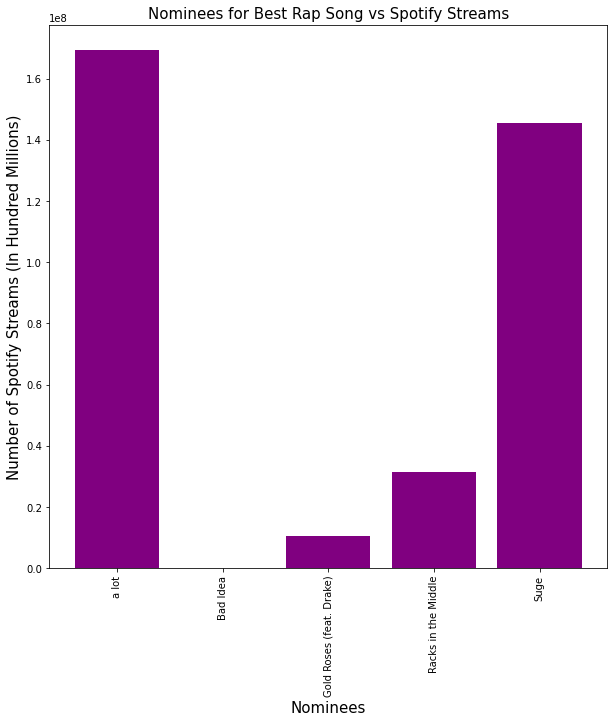

In [55]:
#Create a bar chart for Best Rap Song

#inserting the raw data
bestrapsong = ['a lot','Bad Idea','Gold Roses (feat. Drake)','Racks in the Middle','Suge']
streams = [169203004,0,10575226,31432352,145471665]



#plotting the bar
plt.figure(figsize=(10,10))
plt.bar(range(0,5),streams, color="purple")
plt.xticks(range(0,5),bestrapsong,rotation=90)
plt.xlabel("Nominees",fontsize = 15)
plt.ylabel("Number of Spotify Streams (In Hundred Millions)",fontsize=15)
plt.title ("Nominees for Best Rap Song vs Spotify Streams",fontsize=15)
plt.savefig('resources/BestRapSong_q2.png')
plt.show()


In [ ]:
# ANANLYZE SPOTIFY SONGS & BEST R&B SONG GRAMMY DATA

In [56]:
#Load the csv file that contains r&b
RBSong_df=pd.read_csv('resources/BestRBSong_clean_q2.csv')
RBSong_df


,year,title,published_at,updated_at,category,nominee,artist,workers,img,winner
0,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best R&B Song,Say So,PJ Morton,"PJ Morton, songwriter (PJ Morton Featuring JoJo)",https://www.grammy.com/sites/com/files/styles/...,Yes
1,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best R&B Song,Could've Been,H.E.R.,"Dernst Emile II, David ‚ÄúSwagg R‚ÄôCelious‚Äù...",https://www.grammy.com/sites/com/files/styles/...,No
2,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best R&B Song,Look At Me Now,Emily King,Emily King,https://www.grammy.com/sites/com/files/styles/...,No
3,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best R&B Song,No Guidance (feat. Drake),Chris Brown,"Chris Brown, Tyler James Bryant, Nija Charles,...",https://www.grammy.com/sites/com/files/styles/...,No
4,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best R&B Song,Roll Some Mo,Lucky Daye,"David Brown, Dernst Emile II & Peter Lee Johns...",https://www.grammy.com/sites/com/files/styles/...,No


In [57]:
# Get list of columns
RBSong_df.columns


Index(['year', 'title', 'published_at', 'updated_at', 'category', 'nominee',
       'artist', 'workers', 'img', 'winner'],
      dtype='object')

In [58]:
# Rename the columns in the df and make a common column name so we can complete the 
# We are going to merge based on Track Name column
RBSong_df.rename(columns = ({'year':'Year','title':'Grammy Title','published_at': 'Published At', 
                               'updated_at': 'Updated At','category': 'Category', 'nominee':'Track Name',
                               'artist':'Artist',
                               'workers':'Song Credits','img':'IMG Link',
                              'winner':'Winner'}),
inplace=True,)

RBSong_df.head()


,Year,Grammy Title,Published At,Updated At,Category,Track Name,Artist,Song Credits,IMG Link,Winner
0,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best R&B Song,Say So,PJ Morton,"PJ Morton, songwriter (PJ Morton Featuring JoJo)",https://www.grammy.com/sites/com/files/styles/...,Yes
1,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best R&B Song,Could've Been,H.E.R.,"Dernst Emile II, David ‚ÄúSwagg R‚ÄôCelious‚Äù...",https://www.grammy.com/sites/com/files/styles/...,No
2,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best R&B Song,Look At Me Now,Emily King,Emily King,https://www.grammy.com/sites/com/files/styles/...,No
3,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best R&B Song,No Guidance (feat. Drake),Chris Brown,"Chris Brown, Tyler James Bryant, Nija Charles,...",https://www.grammy.com/sites/com/files/styles/...,No
4,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best R&B Song,Roll Some Mo,Lucky Daye,"David Brown, Dernst Emile II & Peter Lee Johns...",https://www.grammy.com/sites/com/files/styles/...,No


In [59]:
# Now merge the spotify_df with the new df using a right join on the column Track Name 
# This displays data for artist found in both data frames
RBSongMerge=pd.merge(TrackNamePivot,RBSong_df,on="Track Name", how = 'right')
RBSongMerge.head()


,Track Name,Number of Streams,Year,Grammy Title,Published At,Updated At,Category,Artist,Song Credits,IMG Link,Winner
0,Say So,NaN,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best R&B Song,PJ Morton,"PJ Morton, songwriter (PJ Morton Featuring JoJo)",https://www.grammy.com/sites/com/files/styles/...,Yes
1,Could've Been,NaN,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best R&B Song,H.E.R.,"Dernst Emile II, David ‚ÄúSwagg R‚ÄôCelious‚Äù...",https://www.grammy.com/sites/com/files/styles/...,No
2,Look At Me Now,NaN,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best R&B Song,Emily King,Emily King,https://www.grammy.com/sites/com/files/styles/...,No
3,No Guidance (feat. Drake),105628763.0,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best R&B Song,Chris Brown,"Chris Brown, Tyler James Bryant, Nija Charles,...",https://www.grammy.com/sites/com/files/styles/...,No
4,Roll Some Mo,NaN,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best R&B Song,Lucky Daye,"David Brown, Dernst Emile II & Peter Lee Johns...",https://www.grammy.com/sites/com/files/styles/...,No


In [60]:
# Get a list of all the columns
RBSongMerge.columns


Index(['Track Name', 'Number of Streams', 'Year', 'Grammy Title',
       'Published At', 'Updated At', 'Category', 'Artist', 'Song Credits',
       'IMG Link', 'Winner'],
      dtype='object')

In [61]:
# Remove all unnecessary columns
RBSongMerge.drop(['Published At', 'Updated At', 'Song Credits',
       'IMG Link'], axis=1, inplace = True)


In [62]:
RBSongMerge.head()


,Track Name,Number of Streams,Year,Grammy Title,Category,Artist,Winner
0,Say So,NaN,2019,62nd Annual GRAMMY Awards (2019),Best R&B Song,PJ Morton,Yes
1,Could've Been,NaN,2019,62nd Annual GRAMMY Awards (2019),Best R&B Song,H.E.R.,No
2,Look At Me Now,NaN,2019,62nd Annual GRAMMY Awards (2019),Best R&B Song,Emily King,No
3,No Guidance (feat. Drake),105628763.0,2019,62nd Annual GRAMMY Awards (2019),Best R&B Song,Chris Brown,No
4,Roll Some Mo,NaN,2019,62nd Annual GRAMMY Awards (2019),Best R&B Song,Lucky Daye,No


In [63]:
# There are numerical columns with missing data that should be numbers but are not populated becasue the 
# artist did not appear have any songs appear in the spotify_df due to the US top weekly only showcasing 
# the top 200 songs per week
# Therefore fill any empty data / nAs with 0 
cleanRBSongMerge = RBSongMerge.fillna(0)
cleanRBSongMerge


,Track Name,Number of Streams,Year,Grammy Title,Category,Artist,Winner
0,Say So,0.0,2019,62nd Annual GRAMMY Awards (2019),Best R&B Song,PJ Morton,Yes
1,Could've Been,0.0,2019,62nd Annual GRAMMY Awards (2019),Best R&B Song,H.E.R.,No
2,Look At Me Now,0.0,2019,62nd Annual GRAMMY Awards (2019),Best R&B Song,Emily King,No
3,No Guidance (feat. Drake),105628763.0,2019,62nd Annual GRAMMY Awards (2019),Best R&B Song,Chris Brown,No
4,Roll Some Mo,0.0,2019,62nd Annual GRAMMY Awards (2019),Best R&B Song,Lucky Daye,No


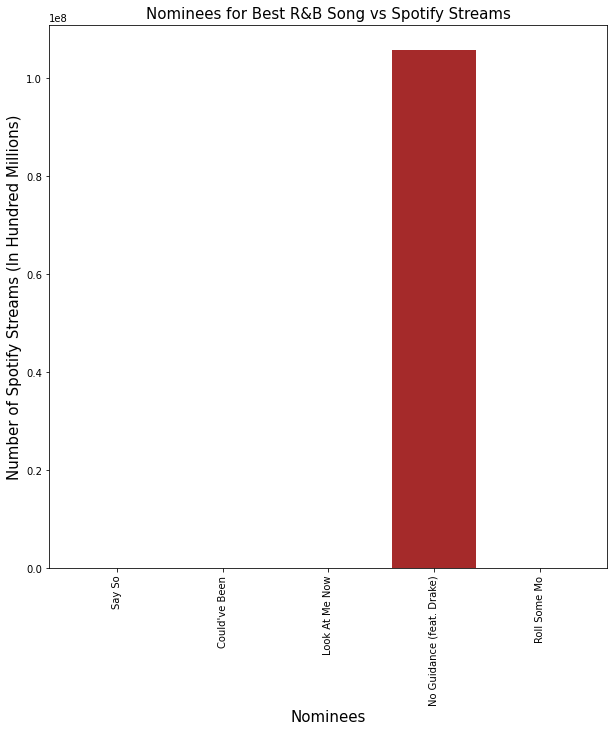

In [64]:
#Create a bar chart for Best R&B Song

#inserting the raw data
bestrnbsong = ["Say So","Could've Been","Look At Me Now","No Guidance (feat. Drake)","Roll Some Mo"]
streams = [0,0,0,105628763,0]



#plotting the bar
plt.figure(figsize=(10,10))
plt.bar(range(0,5),streams, color="brown")
plt.xticks(range(0,5),bestrnbsong,rotation=90)
plt.xlabel("Nominees",fontsize = 15)
plt.ylabel("Number of Spotify Streams (In Hundred Millions)",fontsize=15)
plt.title ("Nominees for Best R&B Song vs Spotify Streams",fontsize=15)
plt.savefig('resources/bestrnbsong_q2.png')
plt.show()



In [ ]:
# ANANLYZE SPOTIFY SONGS & BEST ROCK SONG GRAMMY DATA

In [65]:
#Load the csv file that contains rock
RockSong_df=pd.read_csv('resources/BestRockSong_clean_q2.csv')
RockSong_df


,year,title,published_at,updated_at,category,nominee,artist,workers,img,winner
0,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best Rock Song,This Land,Gary Clark Jr.,"Gary Clark Jr., songwriter (Gary Clark Jr.)",https://www.grammy.com/sites/com/files/styles/...,Yes
1,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best Rock Song,Fear Inoculum,TOOL,"Danny Carey, Justin Chancellor, Adam Jones & M...",https://www.grammy.com/sites/com/files/styles/...,No
2,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best Rock Song,Give Yourself A Try,The 1975,"George Daniel, Adam Hann, Matthew Healy & Ross...",https://www.grammy.com/sites/com/files/styles/...,No
3,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best Rock Song,Harmony Hall,Vampire Weekend,"Ezra Koenig, songwriter (Vampire Weekend)",NaN,No
4,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best Rock Song,History Repeats,Brittany Howard,"Brittany Howard, songwriter (Brittany Howard)",https://www.grammy.com/sites/com/files/styles/...,No


In [66]:
# Get list of columns
RockSong_df.columns


Index(['year', 'title', 'published_at', 'updated_at', 'category', 'nominee',
       'artist', 'workers', 'img', 'winner'],
      dtype='object')

In [67]:
# Rename the columns in the df and make a common column name so we can complete the merge
# We are going to merge based on Track Name column
RockSong_df.rename(columns = ({'year':'Year','title':'Grammy Title','published_at': 'Published At', 
                               'updated_at': 'Updated At','category': 'Category', 'nominee':'Track Name',
                               'artist':'Artist',
                               'workers':'Song Credits','img':'IMG Link',
                              'winner':'Winner'}),
inplace=True,)

RockSong_df.head()


,Year,Grammy Title,Published At,Updated At,Category,Track Name,Artist,Song Credits,IMG Link,Winner
0,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best Rock Song,This Land,Gary Clark Jr.,"Gary Clark Jr., songwriter (Gary Clark Jr.)",https://www.grammy.com/sites/com/files/styles/...,Yes
1,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best Rock Song,Fear Inoculum,TOOL,"Danny Carey, Justin Chancellor, Adam Jones & M...",https://www.grammy.com/sites/com/files/styles/...,No
2,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best Rock Song,Give Yourself A Try,The 1975,"George Daniel, Adam Hann, Matthew Healy & Ross...",https://www.grammy.com/sites/com/files/styles/...,No
3,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best Rock Song,Harmony Hall,Vampire Weekend,"Ezra Koenig, songwriter (Vampire Weekend)",NaN,No
4,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best Rock Song,History Repeats,Brittany Howard,"Brittany Howard, songwriter (Brittany Howard)",https://www.grammy.com/sites/com/files/styles/...,No


In [68]:
# Now merge the spotify_df with the new df using a right join on the column Track Name 
# This displays data for artist found in both data frames
RockSongMerge=pd.merge(TrackNamePivot,RockSong_df,on="Track Name", how = 'right')
RockSongMerge.head()


,Track Name,Number of Streams,Year,Grammy Title,Published At,Updated At,Category,Artist,Song Credits,IMG Link,Winner
0,This Land,NaN,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best Rock Song,Gary Clark Jr.,"Gary Clark Jr., songwriter (Gary Clark Jr.)",https://www.grammy.com/sites/com/files/styles/...,Yes
1,Fear Inoculum,3409598.0,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best Rock Song,TOOL,"Danny Carey, Justin Chancellor, Adam Jones & M...",https://www.grammy.com/sites/com/files/styles/...,No
2,Give Yourself A Try,NaN,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best Rock Song,The 1975,"George Daniel, Adam Hann, Matthew Healy & Ross...",https://www.grammy.com/sites/com/files/styles/...,No
3,Harmony Hall,1703918.0,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best Rock Song,Vampire Weekend,"Ezra Koenig, songwriter (Vampire Weekend)",NaN,No
4,History Repeats,NaN,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best Rock Song,Brittany Howard,"Brittany Howard, songwriter (Brittany Howard)",https://www.grammy.com/sites/com/files/styles/...,No


In [69]:
# Get a list of all the columns
RockSongMerge.columns


Index(['Track Name', 'Number of Streams', 'Year', 'Grammy Title',
       'Published At', 'Updated At', 'Category', 'Artist', 'Song Credits',
       'IMG Link', 'Winner'],
      dtype='object')

In [70]:
# Remove all unnecessary columns
RockSongMerge.drop(['Published At', 'Updated At', 'Song Credits',
       'IMG Link'], axis=1, inplace = True)


In [71]:
RockSongMerge.head()


,Track Name,Number of Streams,Year,Grammy Title,Category,Artist,Winner
0,This Land,NaN,2019,62nd Annual GRAMMY Awards (2019),Best Rock Song,Gary Clark Jr.,Yes
1,Fear Inoculum,3409598.0,2019,62nd Annual GRAMMY Awards (2019),Best Rock Song,TOOL,No
2,Give Yourself A Try,NaN,2019,62nd Annual GRAMMY Awards (2019),Best Rock Song,The 1975,No
3,Harmony Hall,1703918.0,2019,62nd Annual GRAMMY Awards (2019),Best Rock Song,Vampire Weekend,No
4,History Repeats,NaN,2019,62nd Annual GRAMMY Awards (2019),Best Rock Song,Brittany Howard,No


In [72]:
# There are numerical columns with missing data that should be numbers but are not populated becasue the 
# artist did not appear have any songs appear in the spotify_df due to the US top weekly only showcasing 
# the top 200 songs per week
# Therefore fill any empty data / nAs with 0 
cleanRockSongMerge = RockSongMerge.fillna(0)
cleanRockSongMerge


,Track Name,Number of Streams,Year,Grammy Title,Category,Artist,Winner
0,This Land,0.0,2019,62nd Annual GRAMMY Awards (2019),Best Rock Song,Gary Clark Jr.,Yes
1,Fear Inoculum,3409598.0,2019,62nd Annual GRAMMY Awards (2019),Best Rock Song,TOOL,No
2,Give Yourself A Try,0.0,2019,62nd Annual GRAMMY Awards (2019),Best Rock Song,The 1975,No
3,Harmony Hall,1703918.0,2019,62nd Annual GRAMMY Awards (2019),Best Rock Song,Vampire Weekend,No
4,History Repeats,0.0,2019,62nd Annual GRAMMY Awards (2019),Best Rock Song,Brittany Howard,No


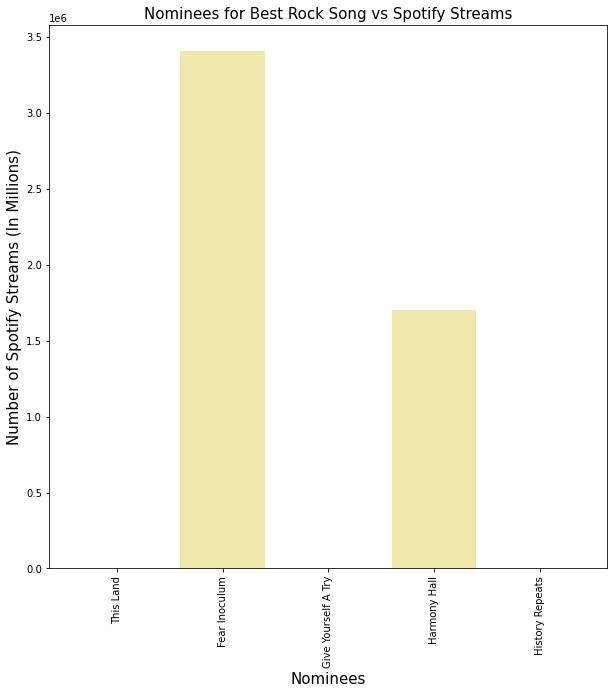

In [73]:
#Create a bar chart for Best Rock Song

#inserting the raw data
bestrocksong = ['This Land','Fear Inoculum','Give Yourself A Try','Harmony Hall','History Repeats']
streams = [0,3409598,0,1703918,0]



#plotting the bar
plt.figure(figsize=(10,10))
plt.bar(range(0,5),streams, color="palegoldenrod")
plt.xticks(range(0,5),bestrocksong,rotation=90)
plt.xlabel("Nominees",fontsize = 15)
plt.ylabel("Number of Spotify Streams (In Millions)",fontsize=15)
plt.title ("Nominees for Best Rock Song vs Spotify Streams",fontsize=15)
plt.savefig('resources/BestRockSong_q2.png')
plt.show()


In [ ]:
# ANANLYZE SPOTIFY SONGS & BEST COUNTRY SONG GRAMMY DATA

In [74]:
#Load the csv file that contains country
CountrySong_df=pd.read_csv('resources/BestCountrySong_clean_q2.csv')
CountrySong_df


,year,title,published_at,updated_at,category,nominee,artist,workers,img,winner
0,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best Country Song,Bring My Flowers Now,Tanya Tucker,"Brandi Carlile, Phil Hanseroth, Tim Hanseroth ...",https://www.grammy.com/sites/com/files/styles/...,Yes
1,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best Country Song,Girl Goin' Nowhere,Ashley McBryde,"Jeremy Bussey & Ashley McBryde, songwriters (A...",https://www.grammy.com/sites/com/files/styles/...,No
2,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best Country Song,It All Comes Out In The Wash,Miranda Lambert,"Miranda Lambert, Hillary Lindsey, Lori McKenna...",https://www.grammy.com/sites/com/files/styles/...,No
3,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best Country Song,Some Of It,Eric Church,"Eric Church, Clint Daniels, Jeff Hyde & Bobby ...",https://www.grammy.com/sites/com/files/styles/...,No
4,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best Country Song,Speechless,Dan + Shay,"Shay Mooney, Jordan Reynolds, Dan Smyers & Lau...",https://www.grammy.com/sites/com/files/styles/...,No


In [75]:
# Get list of columns
CountrySong_df.columns


Index(['year', 'title', 'published_at', 'updated_at', 'category', 'nominee',
       'artist', 'workers', 'img', 'winner'],
      dtype='object')

In [76]:
# Rename the columns in the df and make a common column name so we can complete the merge
# We are going to merge based on Track Name column
CountrySong_df.rename(columns = ({'year':'Year','title':'Grammy Title','published_at': 'Published At', 
                               'updated_at': 'Updated At','category': 'Category', 'nominee':'Track Name',
                               'artist':'Artist',
                               'workers':'Song Credits','img':'IMG Link',
                              'winner':'Winner'}),
inplace=True,)

CountrySong_df.head()


,Year,Grammy Title,Published At,Updated At,Category,Track Name,Artist,Song Credits,IMG Link,Winner
0,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best Country Song,Bring My Flowers Now,Tanya Tucker,"Brandi Carlile, Phil Hanseroth, Tim Hanseroth ...",https://www.grammy.com/sites/com/files/styles/...,Yes
1,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best Country Song,Girl Goin' Nowhere,Ashley McBryde,"Jeremy Bussey & Ashley McBryde, songwriters (A...",https://www.grammy.com/sites/com/files/styles/...,No
2,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best Country Song,It All Comes Out In The Wash,Miranda Lambert,"Miranda Lambert, Hillary Lindsey, Lori McKenna...",https://www.grammy.com/sites/com/files/styles/...,No
3,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best Country Song,Some Of It,Eric Church,"Eric Church, Clint Daniels, Jeff Hyde & Bobby ...",https://www.grammy.com/sites/com/files/styles/...,No
4,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best Country Song,Speechless,Dan + Shay,"Shay Mooney, Jordan Reynolds, Dan Smyers & Lau...",https://www.grammy.com/sites/com/files/styles/...,No


In [77]:
# Now merge the spotify_df with the new df using a right join on the column Track Name 
# This displays data for artist found in both data frames
CountrySongMerge=pd.merge(TrackNamePivot,CountrySong_df,on="Track Name", how = 'right')
CountrySongMerge.head()


,Track Name,Number of Streams,Year,Grammy Title,Published At,Updated At,Category,Artist,Song Credits,IMG Link,Winner
0,Bring My Flowers Now,NaN,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best Country Song,Tanya Tucker,"Brandi Carlile, Phil Hanseroth, Tim Hanseroth ...",https://www.grammy.com/sites/com/files/styles/...,Yes
1,Girl Goin' Nowhere,NaN,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best Country Song,Ashley McBryde,"Jeremy Bussey & Ashley McBryde, songwriters (A...",https://www.grammy.com/sites/com/files/styles/...,No
2,It All Comes Out In The Wash,NaN,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best Country Song,Miranda Lambert,"Miranda Lambert, Hillary Lindsey, Lori McKenna...",https://www.grammy.com/sites/com/files/styles/...,No
3,Some Of It,NaN,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best Country Song,Eric Church,"Eric Church, Clint Daniels, Jeff Hyde & Bobby ...",https://www.grammy.com/sites/com/files/styles/...,No
4,Speechless,105075559.0,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best Country Song,Dan + Shay,"Shay Mooney, Jordan Reynolds, Dan Smyers & Lau...",https://www.grammy.com/sites/com/files/styles/...,No


In [78]:
# Get a list of all the columns
CountrySongMerge.columns


Index(['Track Name', 'Number of Streams', 'Year', 'Grammy Title',
       'Published At', 'Updated At', 'Category', 'Artist', 'Song Credits',
       'IMG Link', 'Winner'],
      dtype='object')

In [79]:
# Remove all unnecessary columns

CountrySongMerge.drop(['Published At', 'Updated At', 'Song Credits',
       'IMG Link'], axis=1, inplace = True)


In [80]:
CountrySongMerge.head()


,Track Name,Number of Streams,Year,Grammy Title,Category,Artist,Winner
0,Bring My Flowers Now,NaN,2019,62nd Annual GRAMMY Awards (2019),Best Country Song,Tanya Tucker,Yes
1,Girl Goin' Nowhere,NaN,2019,62nd Annual GRAMMY Awards (2019),Best Country Song,Ashley McBryde,No
2,It All Comes Out In The Wash,NaN,2019,62nd Annual GRAMMY Awards (2019),Best Country Song,Miranda Lambert,No
3,Some Of It,NaN,2019,62nd Annual GRAMMY Awards (2019),Best Country Song,Eric Church,No
4,Speechless,105075559.0,2019,62nd Annual GRAMMY Awards (2019),Best Country Song,Dan + Shay,No


In [81]:
# There are numerical columns with missing data that should be numbers but are not populated becasue the 
# artist did not appear have any songs appear in the spotify_df due to the US top weekly only showcasing 
# the top 200 songs per week
# Therefore fill any empty data / nAs with 0 
cleanCountrySongMerge = CountrySongMerge.fillna(0)
cleanCountrySongMerge


,Track Name,Number of Streams,Year,Grammy Title,Category,Artist,Winner
0,Bring My Flowers Now,0.0,2019,62nd Annual GRAMMY Awards (2019),Best Country Song,Tanya Tucker,Yes
1,Girl Goin' Nowhere,0.0,2019,62nd Annual GRAMMY Awards (2019),Best Country Song,Ashley McBryde,No
2,It All Comes Out In The Wash,0.0,2019,62nd Annual GRAMMY Awards (2019),Best Country Song,Miranda Lambert,No
3,Some Of It,0.0,2019,62nd Annual GRAMMY Awards (2019),Best Country Song,Eric Church,No
4,Speechless,105075559.0,2019,62nd Annual GRAMMY Awards (2019),Best Country Song,Dan + Shay,No


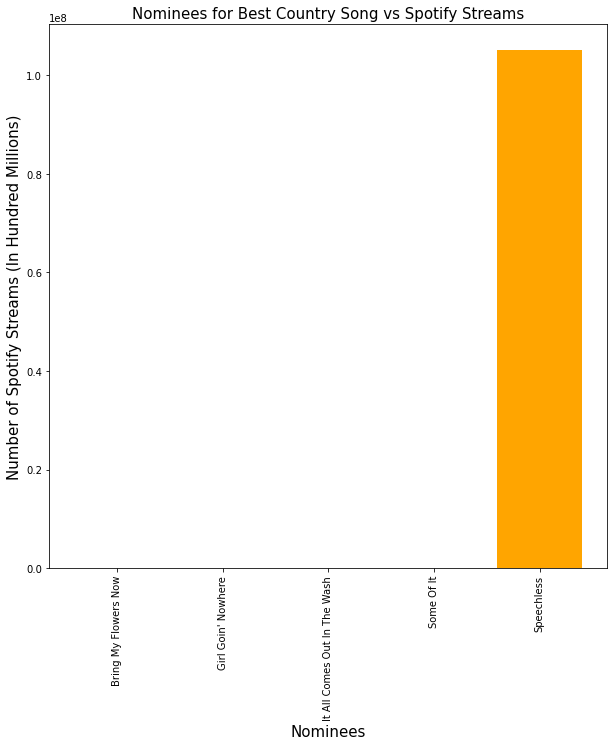

In [82]:
#Create a bar chart for Best Country Song

#inserting the raw data
bestcountrysong = ["Bring My Flowers Now","Girl Goin' Nowhere","It All Comes Out In The Wash","Some Of It",
                   "Speechless"]
streams = [0,0,0,0,105075559]



#plotting the bar
plt.figure(figsize=(10,10))
plt.bar(range(0,5),streams, color="orange")
plt.xticks(range(0,5),bestcountrysong,rotation=90)
plt.xlabel("Nominees",fontsize = 15)
plt.ylabel("Number of Spotify Streams (In Hundred Millions)",fontsize=15)
plt.title ("Nominees for Best Country Song vs Spotify Streams",fontsize=15)
plt.savefig('resources/BestCountrySong_q2.png')
plt.show()
